## Import library

In [1]:
import numpy as np 
import pandas as pd 
from datetime import datetime
import copy as cp
import calendar
from datetime import timedelta

In [2]:
# 載入所需函示庫
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels
import statsmodels.stats.libqsturng
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 150

In [3]:
def strtoint(s):
   #print(s)
    if type(s) != str :
        return s
    ss = s.split(',')
    #print(ss[0])
    temp = 0
    for i in range(len(ss)):
        temp = temp * 1000 + int(ss[i])
#     temp = float(temp / 1000000)
    return temp

## Build a library

In [4]:
transportCnt = dict()

In [5]:
year = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
month = ['01','02','03','04','05','06','07','08','09','10','11','12']

In [6]:
for i in year:
    for j in month:
        if i == '2022' and j == '04':
            break
        dt_name = '+OÑ_¦¦¦BÑ¦¿t¦+«+¦B¦q¦+¡p_' + i + j+'.csv'
        df = pd.read_csv(dt_name,encoding='big5')
        for k in range(df.shape[0]):
            tmp = df['營運日'][k]
            if(tmp != tmp):
                continue
            tmp = df['營運日'][k].split('/')
            date = datetime(int(tmp[0]) + 1911, int(tmp[1]), int(tmp[2]))
            transport = strtoint(df['總運量'][k])
            transportCnt.setdefault(date,transport)

## Functions

In [7]:
def getHoliday(year, Holiday, df):
    name = []
    y = year
    i = year - 2005
    if(type(df[Holiday][i]) == datetime):
        name.append(df[Holiday][i])
    else:
        start, end = df[Holiday][i].split('-')
        start = start.split('/')
        start = [int(s) for s in start]
        end = end.split('/')
        end = [int(s) for s in end]

        if(start[0] == end[0]):
            name += [datetime(y, start[0], x) for x in np.arange(start[1], end[1] + 1, 1)]
        else:
            lastday = calendar.monthrange(y, start[0])[1]
            if(start[0] == 12):
                name += [datetime(y - 1, start[0], x) for x in np.arange(start[1], lastday + 1, 1)]
                name += [datetime(y, end[0], x) for x in np.arange(1, end[1] + 1, 1)]
            else:
                name += [datetime(y, start[0], x) for x in np.arange(start[1], lastday + 1, 1)]
    return name

In [8]:
def getHolidayLength(date):
    holiday, column, i = isHoliday([date.year], h_columns, date)
    if(holiday):
        return df[column][i]
    elif(date.isoweekday() == 6 or date.isoweekday() == 7):
        return 2
    else:
        return 0

In [9]:
def isHoliday(years, columns, date):
    for column in columns:
        for year in years:
            if(date in holiday_rec[column][year - 2005]):
                return True, column, year - 2005
    return False, -1, -1

In [10]:
def holiday_type(date):
    y = date.year
    m = date.month
    d = date.day
    traditional = ['春節', '端午', '中秋']
    national = ['雙十', '二二八', '元旦', '清明', '勞動']
    years = np.arange(2015, 2023, 1)
    if(isTyphoon(date) or ((m == 12) and (d == 31))):
        return float('nan')
    elif(isHoliday(years, traditional, date)[0]):
        return 'Traditional'
    elif(isHoliday(years, national, date)[0]):
        return 'National'
    elif((m == 12 and d == 25) or (m == 2 and d == 14) or (m == 10 and d == 31)):
        return 'Western'
    elif((m == 8 and d == 8) or (m == 5 and d <= 14 and d >= 8 and date.isoweekday() == 7)):
        return 'Fother'
    elif(date.isoweekday() == 6 or date.isoweekday() == 7):
        return 'Weekend'
    else:
        return 'Weekday'

In [11]:
def season(date):
    s = []
    start = 3
    for i in range( 4 ) : 
        s.append( [])
        for j in range( 3 ) :
            s[i].append( start ) 
            start = ( start % 12 ) + 1
    m = date.month
    if(m in s[0]):
        return 'Spring'
    elif(m in s[1]):
        return 'Summer'
    elif(m in s[2]):
        return 'Fall'
    else:
        return 'Winter'

In [12]:
def new_holiday_type(date):
    holidays = [['除夕'], ['春節'], ['端午'], ['中秋'], ['雙十'], ['二二八'], ['元旦'], ['清明']]
    y = date.year
    m = date.month
    d = date.day
    years = np.arange(2015, 2023, 1)
#     if(isTyphoon(date) or ((m == 12) and (d == 31))):
#         return
    for h in holidays:
        if(isHoliday(years, h, date)[0]):
            return h[0]
#     if(date.isoweekday() == 6 or date.isoweekday() == 7):
#         return '假日'
#     return '平日'


In [13]:
def isTyphoon(date):
    if(date in list(df_typhoon['日期'])):
        return True
    return False

## Global

In [14]:
df = pd.read_excel('../歷年連假天數.xlsx')
df = df.drop(index = 18)
df_typhoon = pd.read_excel('../Typhoon_date.xlsx')
columns = ['除夕', '春節.1', '端午.1', '中秋.1', '雙十.1', '二二八.1', '元旦.1', '清明.1', '勞動.1']
years = np.arange(2005, 2023, 1)
# type(df['除夕'][0]) == datetime
holiday_rec = []
for column in columns:
    tmp = []
    for year in years:
        tmp.append(getHoliday(year, column, df))
    holiday_rec.append(tmp)
holiday_rec = pd.DataFrame(holiday_rec).T
h_columns = ['除夕','春節', '端午', '中秋', '雙十', '二二八', '元旦', '清明', '勞動']
holiday_rec.columns = h_columns

--------

In [15]:
df2 = pd.DataFrame(list(transportCnt.items()), columns=['Date', 'TPcnt'])
df2['Holiday_Type'] = [new_holiday_type(day) for day in df2['Date']]
df2['Year'] = [day.year for day in df2['Date']]
df2['Season'] = [season(day) for day in df2['Date']]
df2['Month'] = [day.month for day in df2['Date']]
# df2 = df2.drop(df2[df2['Year'] >= 2020].index)
df2 = df2.dropna().reset_index(drop = True)
df2.head(60)

,Date,TPcnt,Holiday_Type,Year,Season,Month
0,2015-01-01,1796950,元旦,2015,Winter,1
1,2015-01-02,1830184,元旦,2015,Winter,1
2,2015-01-03,1802037,元旦,2015,Winter,1
3,2015-01-04,1585463,元旦,2015,Winter,1
4,2015-02-18,751526,除夕,2015,Winter,2
5,2015-02-19,1342552,春節,2015,Winter,2
6,2015-02-20,1356261,春節,2015,Winter,2
7,2015-02-21,1678593,春節,2015,Winter,2
8,2015-02-22,1653840,春節,2015,Winter,2
9,2015-02-23,1578871,春節,2015,Winter,2


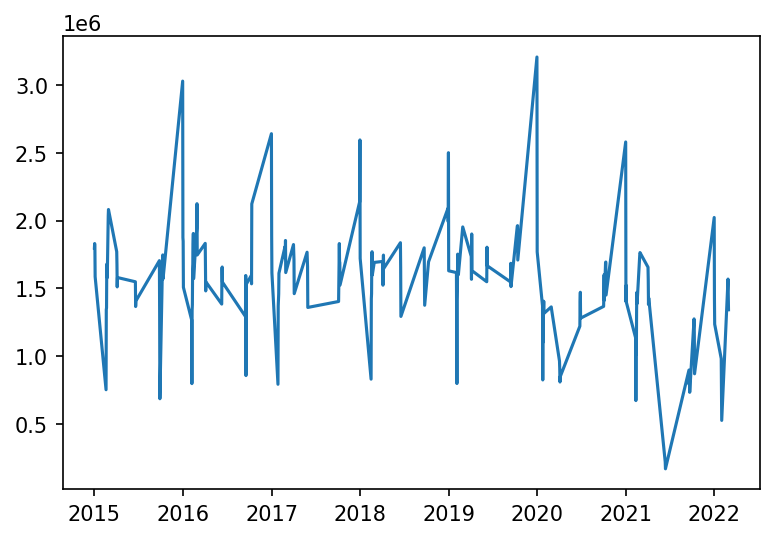

In [16]:
plt.plot(df2['Date'], df2['TPcnt'])

In [17]:
results = smf.ols('TPcnt ~ C(Holiday_Type)', data=df2).fit()
# results.summary()
aov_table = sms.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Holiday_Type),1.254609e+13,7.0,14.787771,2.950632e-15
Residual,2.242225e+13,185.0,NaN,NaN


In [18]:
# results = smf.ols('TPcnt ~ C(Holiday_Type) + C(Year) + C(Holiday_Type):C(Year)', data=df2).fit()
# # results.summary()
# aov = sms.anova_lm(results, typ=2)
# aov

In [19]:
stat, p = stats.shapiro(results.resid)
print('Statistics=%.4f, p=%.4f' % (stat, p))

Statistics=0.9480, p=0.0000


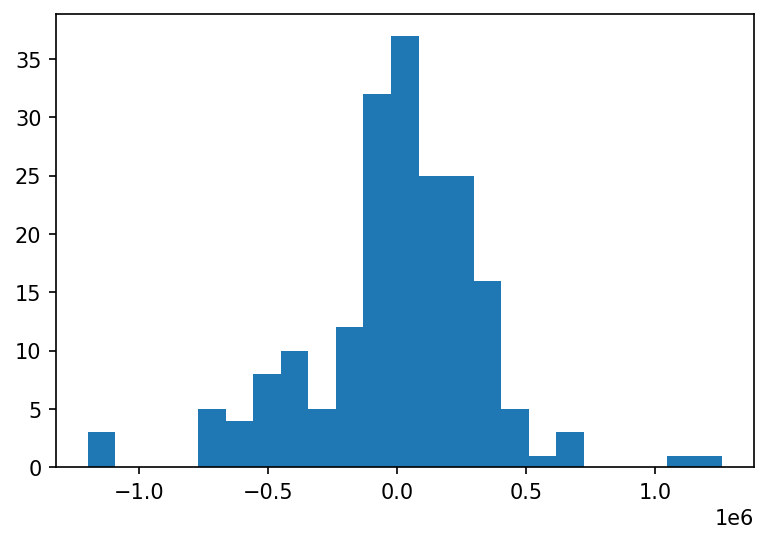

In [20]:
_ = plt.hist(results.resid, bins = "auto")

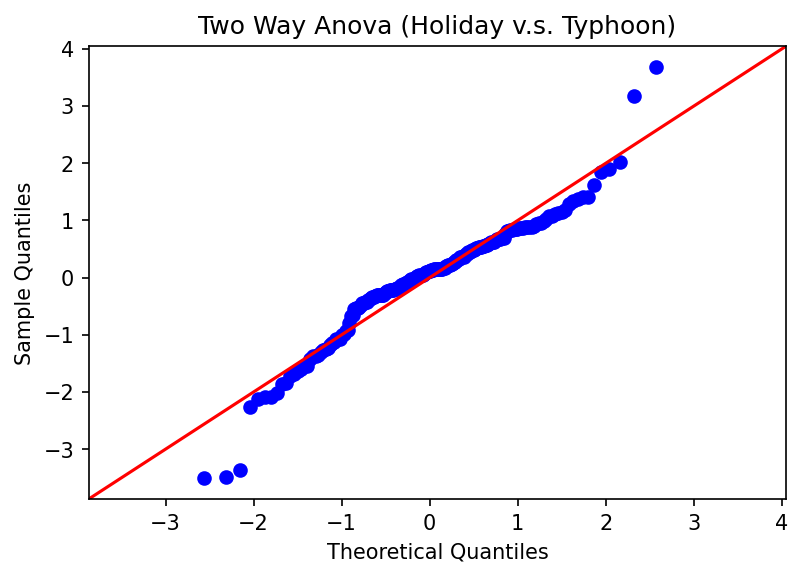

In [21]:
fig = sm.qqplot(results.resid, stats.norm, fit=True, line='45')
plt.title('Two Way Anova (Holiday v.s. Typhoon)')
plt.show()

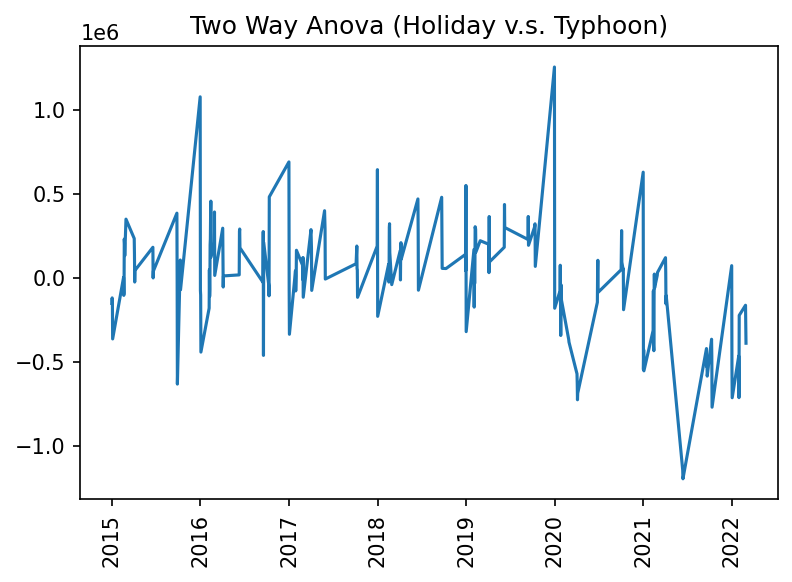

In [22]:
plt.plot(df2['Date'], results.resid)
plt.xticks(rotation = 90)
plt.title('Two Way Anova (Holiday v.s. Typhoon)')
plt.show()

In [23]:
import statsmodels.stats.outliers_influence as sso
st1, data1, ss3 = sso.summary_table(results, alpha=0.05)
SD = data1[:, 10]
df1_c = pd.DataFrame([(SD), df2['Date']]).T
df1_c.columns = ['SD', 'Date']
filte = ((df1_c['SD'] < -1.5) | (df1_c['SD'] > 1.5))
print("Outliers by SD = \n")
display(df1_c[filte].head(30))

Outliers by SD = 



,SD,Date
21,-1.85988,2015-09-28
25,3.15902,2015-12-31
56,2.02343,2016-12-31
82,1.88825,2017-12-31
105,1.61252,2018-12-31
131,3.67926,2019-12-31
142,-1.67134,2020-04-02
143,-1.83789,2020-04-03
144,-2.12329,2020-04-04
145,-2.00837,2020-04-05


In [24]:
mc = smm.MultiComparison(df2['TPcnt'], df2['Holiday_Type'])
print(mc.tukeyhsd().summary())

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
group1 group2    meandiff   p-adj      lower        upper     reject
--------------------------------------------------------------------
    中秋    二二八   413104.6061  0.006    73875.9318  752333.2803   True
    中秋     元旦   631274.9579  0.001   324715.3232  937834.5927   True
    中秋     春節   128829.1591 0.8304  -149875.6365  407533.9547  False
    中秋     清明   216964.6693 0.3548   -84811.4721  518740.8106  False
    中秋     端午    47646.3561    0.9  -267398.2925  362691.0047  False
    中秋     除夕  -569298.2273 0.0026 -1009969.2017 -128627.2528   True
    中秋     雙十   321718.7727 0.0555    -3910.4649  647348.0104  False
   二二八     元旦   218170.3519 0.4477  -106616.3766  542957.0803  False
   二二八     春節   -284275.447  0.075  -582912.3041   14361.4101  False
   二二八     清明  -196139.9368 0.5585  -516415.5194  124135.6458  False
   二二八     端午    -365458.25 0.0204  -698265.6116  -32650.8884   True
   二二八     除夕  -982402.8333  0.001

D:\New folder\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


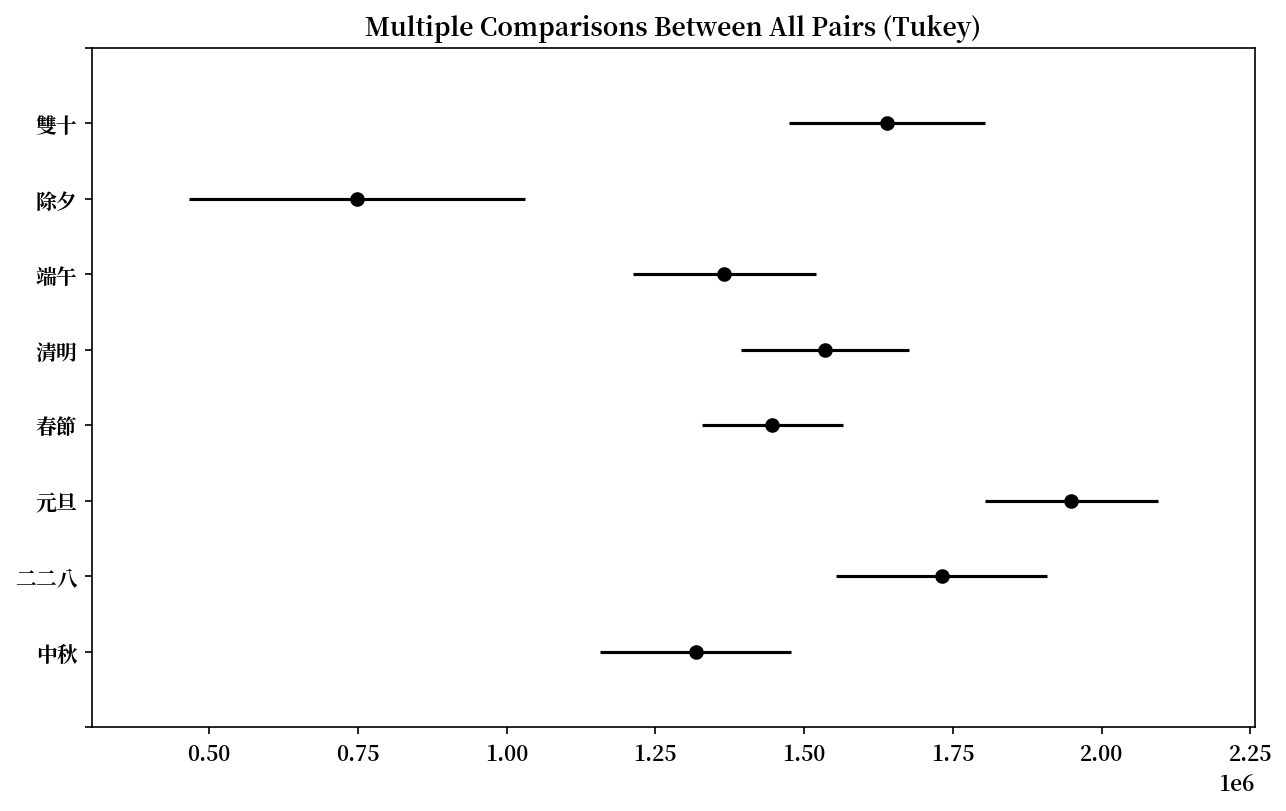

In [25]:
plt.rcParams['font.sans-serif'] = ['Noto Serif TC']
_ = mc.tukeyhsd().plot_simultaneous()

In [26]:
df3 = df2[df2['Holiday_Type'] == '元旦'].reset_index(drop = True)
df3

,Date,TPcnt,Holiday_Type,Year,Season,Month
0,2015-01-01,1796950,元旦,2015,Winter,1
1,2015-01-02,1830184,元旦,2015,Winter,1
2,2015-01-03,1802037,元旦,2015,Winter,1
3,2015-01-04,1585463,元旦,2015,Winter,1
4,2015-12-31,3028347,元旦,2015,Winter,12
5,2016-01-01,1873454,元旦,2016,Winter,1
6,2016-01-02,1846862,元旦,2016,Winter,1
7,2016-01-03,1507044,元旦,2016,Winter,1
8,2016-12-31,2640393,元旦,2016,Winter,12
9,2017-01-01,1884302,元旦,2017,Winter,1


In [27]:
def transfer(date):
    return (date.day + 2) % 31

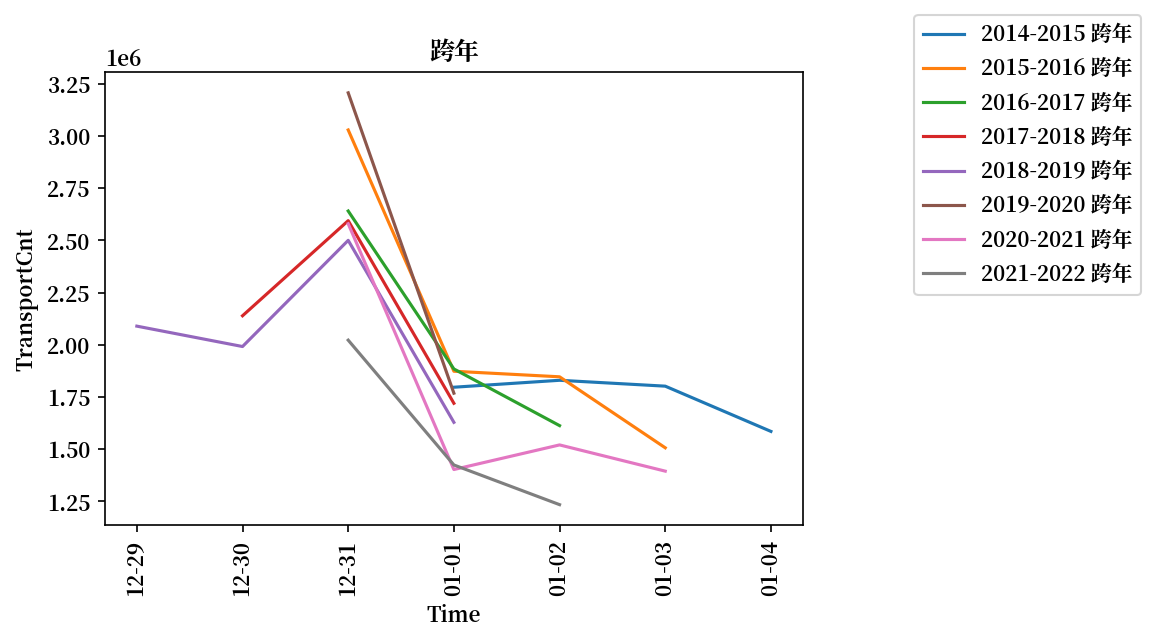

In [28]:
cross = ['12-29', '12-30', '12-31', '01-01', '01-02', '01-03', '01-04']
legend = []
for y in np.arange(2014, 2022, 1):
    df4 = df3[df3['Year'] == y]
    df5 = df3[df3['Year'] == y + 1]
    df4 = df4.drop(df4[df4['Month'] == 1].index)
    df5 = df5.drop(df5[df5['Month'] == 12].index)
    df = pd.concat([df4, df5]).reset_index(drop = True)
    df['tran_date'] = [transfer(day)for day in df['Date']]
#     display(df)
    
    plt.plot(df['tran_date'], df['TPcnt'])
    legend.append(str(y) + "-" + str(y + 1) + " 跨年")
    plt.xlabel("Time")
    plt.ylabel("TransportCnt")

plt.title("跨年")
plt.xticks(np.arange(7), cross, rotation = 90)
plt.legend(legend, loc ="upper right", bbox_to_anchor =(1.5, 1.15))
plt.show()

In [29]:
df3 = pd.concat([df2[df2['Holiday_Type'] == '春節'], df2[df2['Holiday_Type'] == '除夕']])
df3

,Date,TPcnt,Holiday_Type,Year,Season,Month
5,2015-02-19,1342552,春節,2015,Winter,2
6,2015-02-20,1356261,春節,2015,Winter,2
7,2015-02-21,1678593,春節,2015,Winter,2
8,2015-02-22,1653840,春節,2015,Winter,2
9,2015-02-23,1578871,春節,2015,Winter,2
29,2016-02-06,1266416,春節,2016,Winter,2
31,2016-02-08,1335813,春節,2016,Winter,2
32,2016-02-09,1378436,春節,2016,Winter,2
33,2016-02-10,1643528,春節,2016,Winter,2
34,2016-02-11,1679013,春節,2016,Winter,2


In [30]:
def trans_lunar(date, lunar):
     return (date - lunar).days + 2

In [31]:
a = datetime(2015, 9, 15)
b = datetime(2015, 9, 16)
(a < b)

True

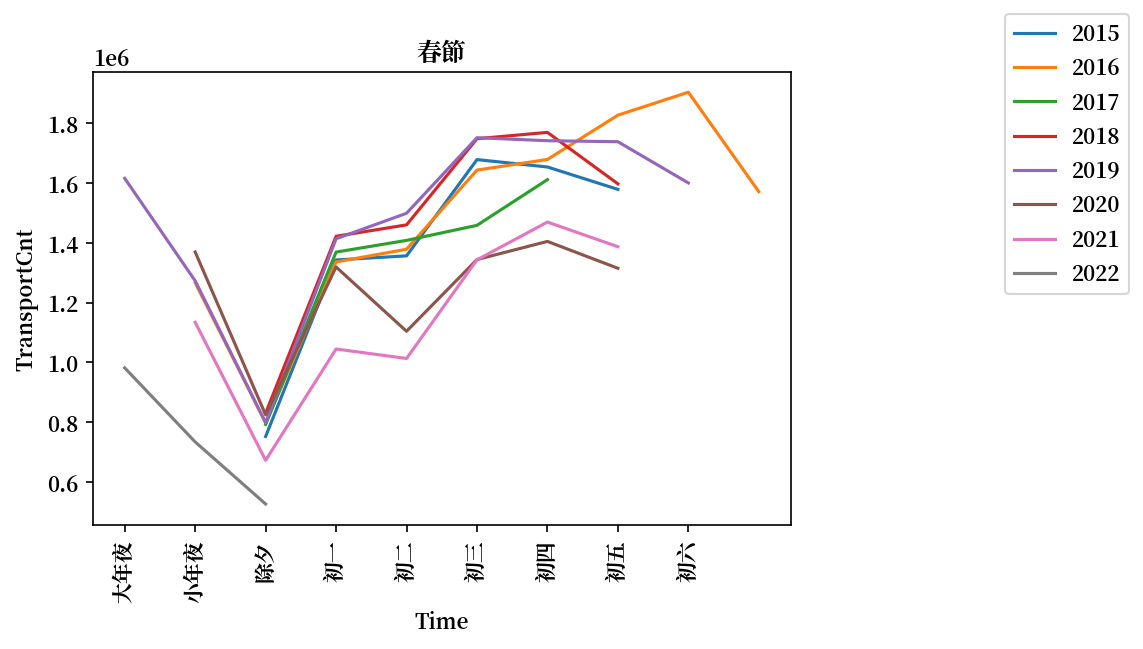

In [32]:
cross = ['大年夜', '小年夜', '除夕', '初一', '初二', '初三', '初四', '初五', '初六']
legend = []
for y in np.arange(2015, 2023, 1):
    df4 = df3[df3['Year'] == y]

    lunar = list(df4[df4['Holiday_Type'] == '除夕']['Date'])[0]
    df = df4.copy()
    df['tran_date'] = [trans_lunar(day, lunar)for day in df['Date']]
    df = df.sort_values(by=['tran_date'])
#     display(df)
    
    plt.plot(df['tran_date'], df['TPcnt'])
    legend.append(y)
    plt.xlabel("Time")
    plt.ylabel("TransportCnt")

plt.title("春節")
plt.xticks(np.arange(9), cross, rotation = 90)
plt.legend(legend, loc ="upper right", bbox_to_anchor =(1.5, 1.15))
plt.show()